<a href="https://www.kaggle.com/code/mostafahafez25/mobile-price-classification-notebook?scriptVersionId=119646327" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

A mobile is a portable telephone that started as a tool that can make and receive calls over a radio frequency link. Now a mobile is used for all sort of utlities like capturing photos and videos, surfing the internet, playing games and finishing work related tasks.

The first handheld mobile phone was demonstrated by John F. Mitchell and Martin Cooper of Motorola in 1973. In 1979, Nippon Telegraph and Telephone (NTT) launched the world's first cellular network in Japan. In 1983, the DynaTAC 8000x was the first commercially available handheld mobile phone. From 1983 to 2014, worldwide mobile phone subscriptions grew to over seven billion—enough to provide one for every person on Earth.

In this Project we are predicting the price range of mobiles on the basis of the mobile Specification like Battery power, 3G enabled , wifi ,Bluetooth, Ram etc...

Features:

        id:ID
        battery_power:Total energy a battery can store in one time measured in mAh
        blue:Has bluetooth or not
        clock_speed:speed at which microprocessor executes instructions
        dual_sim:Has dual sim support or not
        fc:Front Camera mega pixels
        four_g:Has 4G or not
        int_memory:Internal Memory in Gigabytes
        m_dep:Mobile Depth in cm
        mobile_wt:Weight of mobile phone
        n_cores:Number of cores of processor
        pc:Primary Camera mega pixels
        px_height:Pixel Resolution Height
        px_width:Pixel Resolution Width
        ram:Random Access Memory in Megabytes
        sc_h:Screen Height of mobile in cm
        sc_w:Screen Width of mobile in cm
        talk_time:longest time that a single battery charge will last when you are
        three_g:Has 3G or not
        touch_screen:Has touch screen or not
        wifi:Has wifi or not

Target:

    This notebook will help companies estimate price of mobiles to give tough competion to other mobile manufacturer
    Also it will be usefull for Consumers to verify that they are paying best price for a mobile.

In [1]:
import warnings

import numpy as np 
import pandas as pd 
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
%matplotlib inline

from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier
from xgboost import XGBClassifier

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, KFold, GridSearchCV, learning_curve
from sklearn.preprocessing import MinMaxScaler, label_binarize
from sklearn.metrics import classification_report, confusion_matrix, log_loss, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score, f1_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warnings.filterwarnings("ignore")
pd.set_option('max_columns', None)

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


/kaggle/input/mobile-price-classification/train.csv
/kaggle/input/mobile-price-classification/test.csv


In [2]:
data = pd.read_csv('../input/mobile-price-classification/train.csv')
data_test = pd.read_csv('../input/mobile-price-classification/test.csv')

In [3]:
#data_test.drop('id', axis=1,inplace=True)
#print(f"Test dataset has {data_test.shape[0]} rows")

In [4]:
print(f"Training dataset has {data.shape[0]} rows")


Training dataset has 2000 rows


In [5]:
# data = pd.concat([data_train,data_test],ignore_index=True, axis=0)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

All columns has <mark> 0 missing values </mark>.

In [8]:
data.duplicated().sum()

0

There is <mark> no duplicated rows </mark>.

In [9]:
columns = ['battery', 'bluetooth', 'clock_speed', 'dual_sim', 'front_camera', 'service_4g', 'internal_memory', 'depth', 'weight', 'no_cores', 'primary_camera',
           'screen_height_px', 'screen_width_px', 'ram', 'height', 'width', 'talk_time', 'service_3g', 'touch_screen', 'wifi', 'price_range']
data.set_axis(columns, axis=1, inplace=True)
data.head()

,battery,bluetooth,clock_speed,dual_sim,front_camera,service_4g,internal_memory,depth,weight,no_cores,primary_camera,screen_height_px,screen_width_px,ram,height,width,talk_time,service_3g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [10]:
columns = ['battery', 'talk_time', 'clock_speed','ram', 'internal_memory', 'height', 'width', 'depth', 'weight', 'screen_height_px', 'screen_width_px',
           'no_cores', 'front_camera', 'primary_camera', 'bluetooth', 'dual_sim', 'service_4g', 'service_3g', 'touch_screen', 'wifi', 'price_range']
data = data[columns]
data.head()

,battery,talk_time,clock_speed,ram,internal_memory,height,width,depth,weight,screen_height_px,screen_width_px,no_cores,front_camera,primary_camera,bluetooth,dual_sim,service_4g,service_3g,touch_screen,wifi,price_range
0,842,19,2.2,2549,7,9,7,0.6,188,20,756,2,1,2,0,0,0,0,0,1,1
1,1021,7,0.5,2631,53,17,3,0.7,136,905,1988,3,0,6,1,1,1,1,1,0,2
2,563,9,0.5,2603,41,11,2,0.9,145,1263,1716,5,2,6,1,1,1,1,1,0,2
3,615,11,2.5,2769,10,16,8,0.8,131,1216,1786,6,0,9,1,0,0,1,0,0,2
4,1821,15,1.2,1411,44,8,2,0.6,141,1208,1212,2,13,14,1,0,1,1,1,0,1


In [11]:
data.describe()

,battery,talk_time,clock_speed,ram,internal_memory,height,width,depth,weight,screen_height_px,screen_width_px,no_cores,front_camera,primary_camera,bluetooth,dual_sim,service_4g,service_3g,touch_screen,wifi,price_range
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,11.011000,1.522250,2124.213000,32.046500,12.306500,5.767000,0.501750,140.249000,645.108000,1251.515500,4.520500,4.309500,9.916500,0.4950,0.509500,0.521500,0.761500,0.503000,0.507000,1.500000
std,439.418206,5.463955,0.816004,1084.732044,18.145715,4.213245,4.356398,0.288416,35.399655,443.780811,432.199447,2.287837,4.341444,6.064315,0.5001,0.500035,0.499662,0.426273,0.500116,0.500076,1.118314
min,501.000000,2.000000,0.500000,256.000000,2.000000,5.000000,0.000000,0.100000,80.000000,0.000000,500.000000,1.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,6.000000,0.700000,1207.500000,16.000000,9.000000,2.000000,0.200000,109.000000,282.750000,874.750000,3.000000,1.000000,5.000000,0.0000,0.000000,0.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,11.000000,1.500000,2146.500000,32.000000,12.000000,5.000000,0.500000,141.000000,564.000000,1247.000000,4.000000,3.000000,10.000000,0.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,16.000000,2.200000,3064.500000,48.000000,16.000000,9.000000,0.800000,170.000000,947.250000,1633.000000,7.000000,7.000000,15.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,20.000000,3.000000,3998.000000,64.000000,19.000000,18.000000,1.000000,200.000000,1960.000000,1998.000000,8.000000,19.000000,20.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [12]:
features = data.drop('price_range', axis=1)

In [13]:
binary_data = data[['bluetooth', 'dual_sim', 'service_4g', 'service_3g', 'touch_screen', 'wifi']]
for i in binary_data.columns:
    val_c= binary_data[i].value_counts()
    print(i)
    print(val_c, "\n")

bluetooth
0    1010
1     990
Name: bluetooth, dtype: int64 

dual_sim
1    1019
0     981
Name: dual_sim, dtype: int64 

service_4g
1    1043
0     957
Name: service_4g, dtype: int64 

service_3g
1    1523
0     477
Name: service_3g, dtype: int64 

touch_screen
1    1006
0     994
Name: touch_screen, dtype: int64 

wifi
1    1014
0     986
Name: wifi, dtype: int64 



In [14]:
ordinal_data = data[['no_cores', 'front_camera', 'primary_camera']]
for i in ordinal_data.columns:
    val_c= ordinal_data[i].value_counts().sort_index(ascending=True)
    print(i)
    print(val_c, "\n")

no_cores
1    242
2    247
3    246
4    274
5    246
6    230
7    259
8    256
Name: no_cores, dtype: int64 

front_camera
0     474
1     245
2     189
3     170
4     133
5     139
6     112
7     100
8      77
9      78
10     62
11     51
12     45
13     40
14     20
15     23
16     24
17      6
18     11
19      1
Name: front_camera, dtype: int64 

primary_camera
0     101
1     104
2      99
3      93
4      95
5      59
6      95
7     119
8      89
9     112
10    122
11     79
12     90
13     85
14    104
15     92
16     88
17     99
18     82
19     83
20    110
Name: primary_camera, dtype: int64 



In [15]:
ordinal_data.head()

,no_cores,front_camera,primary_camera
0,2,1,2
1,3,0,6
2,5,2,6
3,6,0,9
4,2,13,14


In [16]:
num_data = data[['battery', 'talk_time', 'clock_speed','ram', 'internal_memory', 'height', 'width', 'depth', 'weight', 'screen_height_px', 'screen_width_px',]]
num_data.head()

,battery,talk_time,clock_speed,ram,internal_memory,height,width,depth,weight,screen_height_px,screen_width_px
0,842,19,2.2,2549,7,9,7,0.6,188,20,756
1,1021,7,0.5,2631,53,17,3,0.7,136,905,1988
2,563,9,0.5,2603,41,11,2,0.9,145,1263,1716
3,615,11,2.5,2769,10,16,8,0.8,131,1216,1786
4,1821,15,1.2,1411,44,8,2,0.6,141,1208,1212


In [17]:
target = data[['price_range']]
target.value_counts()

price_range
0              500
1              500
2              500
3              500
dtype: int64

The target values is <mark>equally distributed</mark>.

In [18]:
features.corrwith(target['price_range']).abs().sort_values(ascending=False)

ram                 0.917046
battery             0.200723
screen_width_px     0.165818
screen_height_px    0.148858
internal_memory     0.044435
width               0.038711
primary_camera      0.033599
touch_screen        0.030411
weight              0.030302
service_3g          0.023611
height              0.022986
front_camera        0.021998
talk_time           0.021859
bluetooth           0.020573
wifi                0.018785
dual_sim            0.017444
service_4g          0.014772
clock_speed         0.006606
no_cores            0.004399
depth               0.000853
dtype: float64

The <mark>ram</mark> has a strong correletion with the mobile price range.

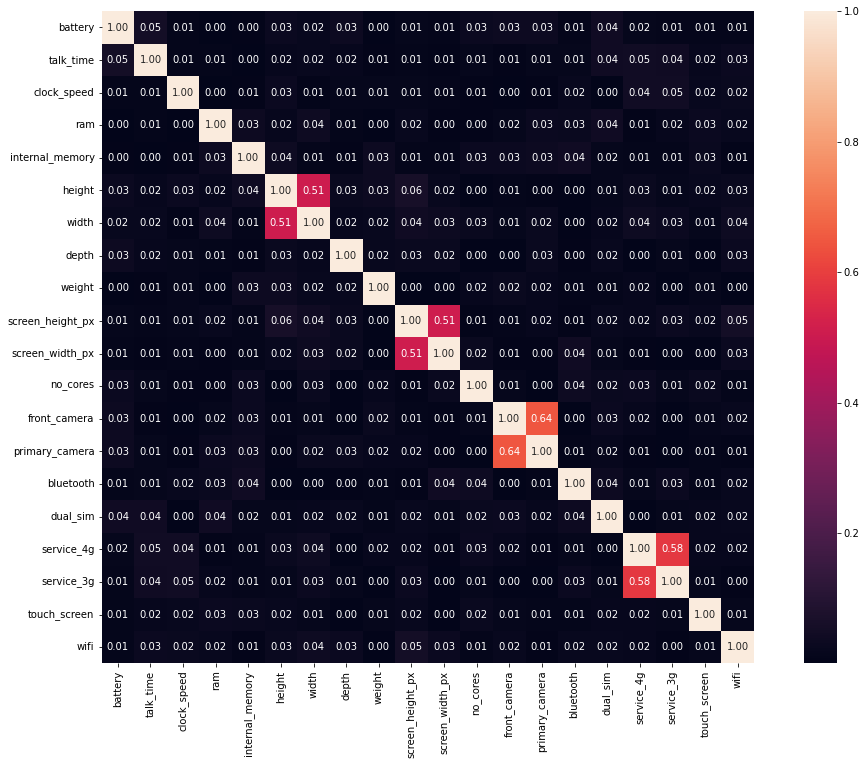

In [19]:
cor = features.corr().abs()

plt.figure(figsize=(18,12))
sns.heatmap(cor, annot=True, fmt='1.2f', square=True)

plt.show()

In [20]:
#plt.figure(figsize=(15,15))
#sns.set_context('notebook')
#sns.pairplot(data)
#hue='price_range'
#plt.show()

In [21]:
for i in num_data.columns.values:
    min = num_data[i].min()
    max = num_data[i].max()
    print(f"{i} lowest value is {min}")
    print(f"{i} highest value is {max} \n")

battery lowest value is 501
battery highest value is 1998 

talk_time lowest value is 2
talk_time highest value is 20 

clock_speed lowest value is 0.5
clock_speed highest value is 3.0 

ram lowest value is 256
ram highest value is 3998 

internal_memory lowest value is 2
internal_memory highest value is 64 

height lowest value is 5
height highest value is 19 

width lowest value is 0
width highest value is 18 

depth lowest value is 0.1
depth highest value is 1.0 

weight lowest value is 80
weight highest value is 200 

screen_height_px lowest value is 0
screen_height_px highest value is 1960 

screen_width_px lowest value is 500
screen_width_px highest value is 1998 



`Height, width, depth and screen height lowest either minimum or maximum values are not logical but we will not delete their values to keep the dataset consistent`

In [22]:
num_data.skew().abs().sort_values(ascending=False)

screen_height_px    0.666271
width               0.633787
clock_speed         0.178084
height              0.098884
depth               0.089082
internal_memory     0.057889
battery             0.031898
screen_width_px     0.014787
talk_time           0.009512
ram                 0.006628
weight              0.006558
dtype: float64

In [23]:
vif = pd.DataFrame([variance_inflation_factor(features, i) for i in range(len(features.columns))], index=features.columns, columns=['vif']).sort_values(by=['vif'],ascending=False)
vif

,vif
weight,12.972548
screen_width_px,11.766282
height,11.510780
battery,8.076717
primary_camera,6.228797
service_3g,6.191783
talk_time,4.859144
ram,4.688608
no_cores,4.646070
screen_height_px,4.262680


In [24]:
scaler = MinMaxScaler()

columns = list(set(features.columns.values) - set(binary_data.columns.values))

for col in columns:
    features[[col]] = scaler.fit_transform(features[[col]])
    
features.head()

,battery,talk_time,clock_speed,ram,internal_memory,height,width,depth,weight,screen_height_px,screen_width_px,no_cores,front_camera,primary_camera,bluetooth,dual_sim,service_4g,service_3g,touch_screen,wifi
0,0.227789,0.944444,0.68,0.612774,0.080645,0.285714,0.388889,0.555556,0.900000,0.010204,0.170895,0.142857,0.052632,0.10,0,0,0,0,0,1
1,0.347361,0.277778,0.00,0.634687,0.822581,0.857143,0.166667,0.666667,0.466667,0.461735,0.993324,0.285714,0.000000,0.30,1,1,1,1,1,0
2,0.041416,0.388889,0.00,0.627205,0.629032,0.428571,0.111111,0.888889,0.541667,0.644388,0.811749,0.571429,0.105263,0.30,1,1,1,1,1,0
3,0.076152,0.500000,0.80,0.671566,0.129032,0.785714,0.444444,0.777778,0.425000,0.620408,0.858478,0.714286,0.000000,0.45,1,0,0,1,0,0
4,0.881764,0.722222,0.28,0.308658,0.677419,0.214286,0.111111,0.555556,0.508333,0.616327,0.475300,0.142857,0.684211,0.70,1,0,1,1,1,0


In [25]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)
print(f"Training features data size {x_train.shape[0]}")
print(f"Training feattures data size {x_test.shape[0]}")
print(f"Test features data size {y_train.shape[0]}")
print(f"Test target data size {y_test.shape[0]}")
      

Training features data size 1600
Training feattures data size 400
Test features data size 1600
Test target data size 400


1.KNearestNeighbor

In [26]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [27]:
y_pred = knn.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.55      0.52        95
           1       0.28      0.37      0.32        92
           2       0.32      0.37      0.35        99
           3       0.64      0.32      0.43       114

    accuracy                           0.40       400
   macro avg       0.43      0.40      0.40       400
weighted avg       0.44      0.40      0.40       400



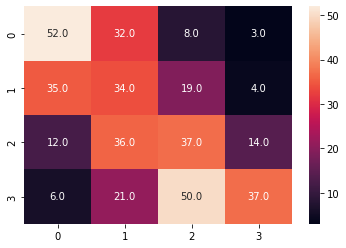

In [28]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='1.1f')
plt.show()

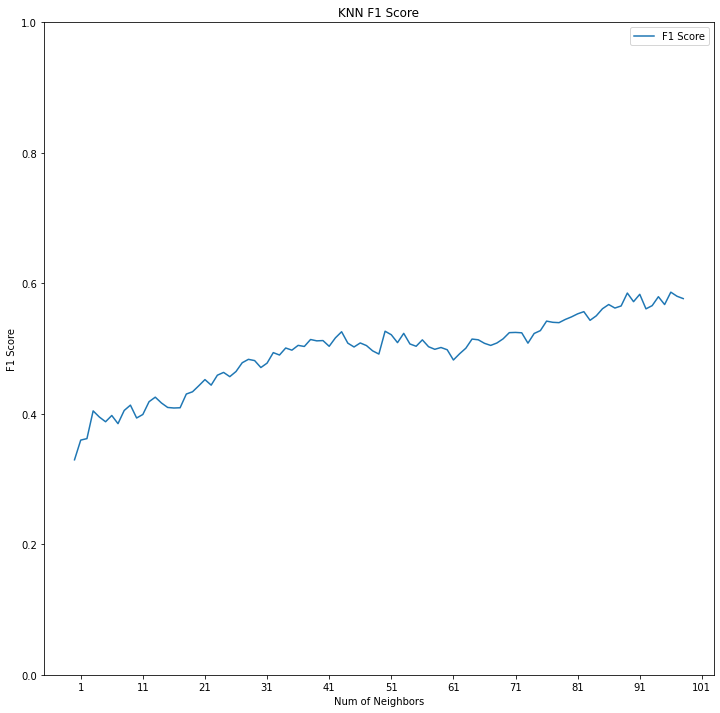

In [29]:
max_k = 100
f1_scores = []
error_rate = []

for k in range(1, max_k):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    f1 = f1_score(y_pred, y_test, average='weighted')
    f1_scores.append((i, f1))
    error_rate.append((k, (1- accuracy_score(y_pred, y_test))))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rate, columns=['K', 'Error Rate'])


ax = f1_results.plot(figsize=(12, 12))
ax.set(xlabel='Num of Neighbors', ylabel='F1 Score')
ax.set_xticks(range(1, max_k+10, 10));
plt.ylim((0, 1))
plt.title('KNN F1 Score')


plt.show()

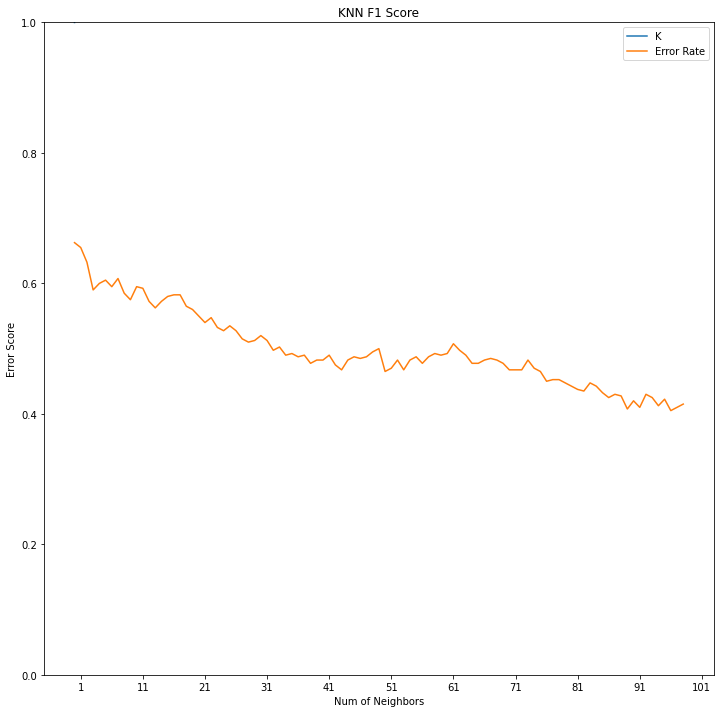

In [30]:
ax = error_results.plot(figsize=(12, 12))
ax.set(xlabel='Num of Neighbors', ylabel='Error Score')
ax.set_xticks(range(1, max_k+10, 10));
plt.ylim((0, 1))
plt.title('KNN F1 Score')


plt.show()

In [31]:
params_grid = {
    "Logisitic Regression" : {
        "penalty" : ['l1','l2'],
        "solver": ['liblinear', 'saga']
    },
    "Support Vector Machine" : {
        'C': [1, 10, 100],
        'kernel': ['poly', 'rbf', 'sigmoid']
    },
    "Decision Tree" : {
        'criterion': ['gini', 'entropy', 'log_loss'],
        'max_depth': [5, 10, 15, 20],
        'min_samples_leaf': [1, 2, 5]
    },
    "Bagging Decision Tree Classifier" : {
        'n_estimators': [2*n+1 for n in range(20)], 
        'base_estimator__criterion': ['gini', 'entropy', 'log_loss'], 
        'base_estimator__max_depth': [5, 10, 15, 20], 
        'base_estimator__min_samples_leaf': [1, 2, 5]
    },
    "Random Forest" : {
        'n_estimators': [15, 20, 30, 40, 50, 100, 150, 200], 
        'criterion': ['gini', 'entropy', 'log_loss'], 
        'max_depth': [5, 10, 15, 20], 
        'min_samples_leaf': [1, 2, 5]
    },

    "XGB Classifier" : {
        'n_estimators': [15, 20, 30, 40, 50, 100, 150, 200], 
        'learning_rate':[0.1, 0.3, 0.5, 0.7, 0.9]
    }
}


In [32]:
models={
    "Logisitic Regression" :LogisticRegressionCV(max_iter=1000000, 
                                                 random_state=0
                                                ),
    "Support Vector Machine" :SVC(random_state=0,
                                 ),
    "Decision Tree" :DecisionTreeClassifier(random_state=0),
    "Bagging Decision Tree Classifier" :BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=0), 
                                                          bootstrap=True, 
                                                          random_state=0, 
                                                          n_jobs=-1
                                                         ),
    "Random Forest" :RandomForestClassifier(warm_start=True,
                                            random_state=0,
                                            n_jobs=-1
                                          ),
    "XGB Classifier" :XGBClassifier(objective='multi:softprob',
                                                eval_metric='mlogloss',
                                                random_state=0,
                                                n_jobs=-1
                                               )
}

In [33]:
def prams_search(params_grid, models):
    for key in params_grid.keys():

        grid_search = GridSearchCV(estimator=models[key], 
                                   param_grid=params_grid[key], 
                                   scoring='accuracy', 
                                   cv=5, 
                                   verbose=True, 
                                   n_jobs=-1)

        grid_search.fit(x_train, y_train.values.ravel())
        best_params = grid_search.best_params_
        best_scores = grid_search.best_score_

        print(key + "\n")
        print(params_grid[key])
        print(models[key])
        print(best_params)
        print(best_scores)
        print("="*50 + "\n")

In [34]:
prams_search(params_grid, models)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Logisitic Regression

{'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}
LogisticRegressionCV(max_iter=1000000, random_state=0)
{'penalty': 'l2', 'solver': 'saga'}
0.9712500000000001

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Support Vector Machine

{'C': [1, 10, 100], 'kernel': ['poly', 'rbf', 'sigmoid']}
SVC(random_state=0)
{'C': 1, 'kernel': 'poly'}
0.8637500000000001

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Decision Tree

{'criterion': ['gini', 'entropy', 'log_loss'], 'max_depth': [5, 10, 15, 20], 'min_samples_leaf': [1, 2, 5]}
DecisionTreeClassifier(random_state=0)
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5}
0.850625

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
Bagging Decision Tree Classifier

{'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39], 'base_estimator__criterion': ['gini', 'entropy',

In [35]:
models_adj={
    "Logisitic Regression" :LogisticRegressionCV(Cs= 100, 
                                                 cv=4,
                                                 max_iter=1000000,
                                                 penalty='l2',
                                                 solver="saga",
                                                 random_state=0
                                                ),
    "Support Vector Machine":SVC(C=1,
                                 kernel='poly',
                                 probability=True
                                ),
    "Decision Tree" :DecisionTreeClassifier(criterion='entropy',
                                            max_depth=10, 
                                            min_samples_leaf=5, 
                                            random_state=0
                                           ),
    "Bagging Decision Tree Classifier" :BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion="entropy", max_depth = 10, min_samples_leaf=2, random_state=2),
                                                          n_estimators=19,
                                                          random_state=0,
                                                          bootstrap=True
                                                         ),
    "Random Forest":RandomForestClassifier(n_estimators=200,
                                           criterion='entropy',
                                           max_depth=20,
                                           min_samples_leaf=2,
                                           warm_start=True,
                                           random_state=0,
                                           n_jobs=-1
                                          ),
    "XGBClassifier":XGBClassifier(objective='multi:softprob',
                                   learning_rate=0.7,
                                   n_estimators=200,
                                   eval_metric='mlogloss',
                                   random_state=0,
                                   n_jobs=-1
                                  )
}

In [36]:
def model_fit(models_adj):
    for key in models_adj.keys():

        print(key)

        models_adj[key].fit(x_train, y_train)

        y_pred = models_adj[key].predict(x_test)
        y_prob = models_adj[key].predict_proba(x_test)

        print(classification_report(y_test, y_pred))

        y_test_br = label_binarize(y_test, classes=[0,1,2,3])

        print(f"The ROC AUC score for {key} model: {roc_auc_score(y_test_br, y_prob, average='weighted')}")
        plt.figure(figsize=(30,8))
        plt.subplot(1, 3, 1)
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='1.1f')

        precision = dict()
        recall = dict()

        plt.subplot(1, 3, 2)
        for i in range(y_test_br.shape[1]):
            precision[i], recall[i], _ = precision_recall_curve(y_test_br[:, i], y_prob[:, i])
            plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

            plt.xlabel("recall")
            plt.ylabel("precision")
            plt.legend(loc="best")
            plt.title("precision vs. recall curve")

        fpr = dict()
        tpr = dict()

        plt.subplot(1, 3, 3)
        for i in range(y_test_br.shape[1]):
            fpr[i], tpr[i], _ = roc_curve(y_test_br[:, i], y_prob[:, i])
            plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))

            plt.xlabel("false positive rate")
            plt.ylabel("true positive rate")
            plt.legend(loc="best")
            plt.title("ROC curve")



        plt.show()

Logisitic Regression
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        95
           1       0.98      0.93      0.96        92
           2       0.94      0.93      0.93        99
           3       0.96      0.98      0.97       114

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400

The ROC AUC score for Logisitic Regression model: 0.9976449425526818


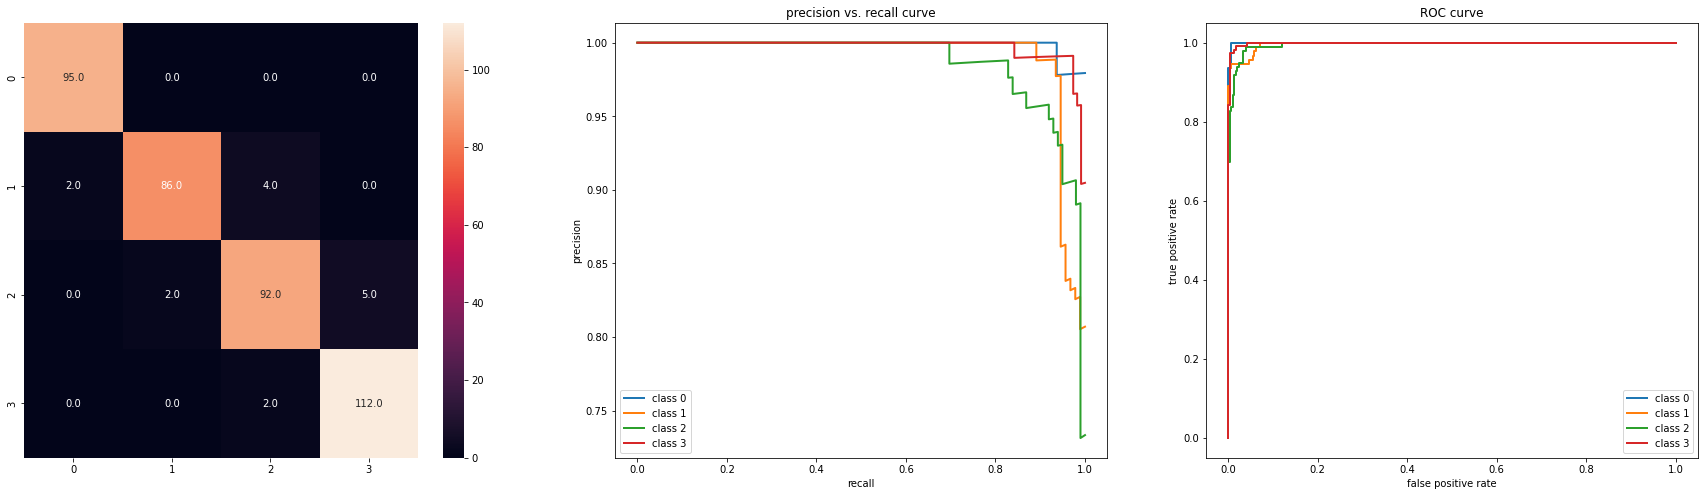

Support Vector Machine
              precision    recall  f1-score   support

           0       0.93      0.92      0.92        95
           1       0.81      0.86      0.84        92
           2       0.87      0.82      0.84        99
           3       0.93      0.95      0.94       114

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.88       400
weighted avg       0.89      0.89      0.89       400

The ROC AUC score for Support Vector Machine model: 0.9847332930603517


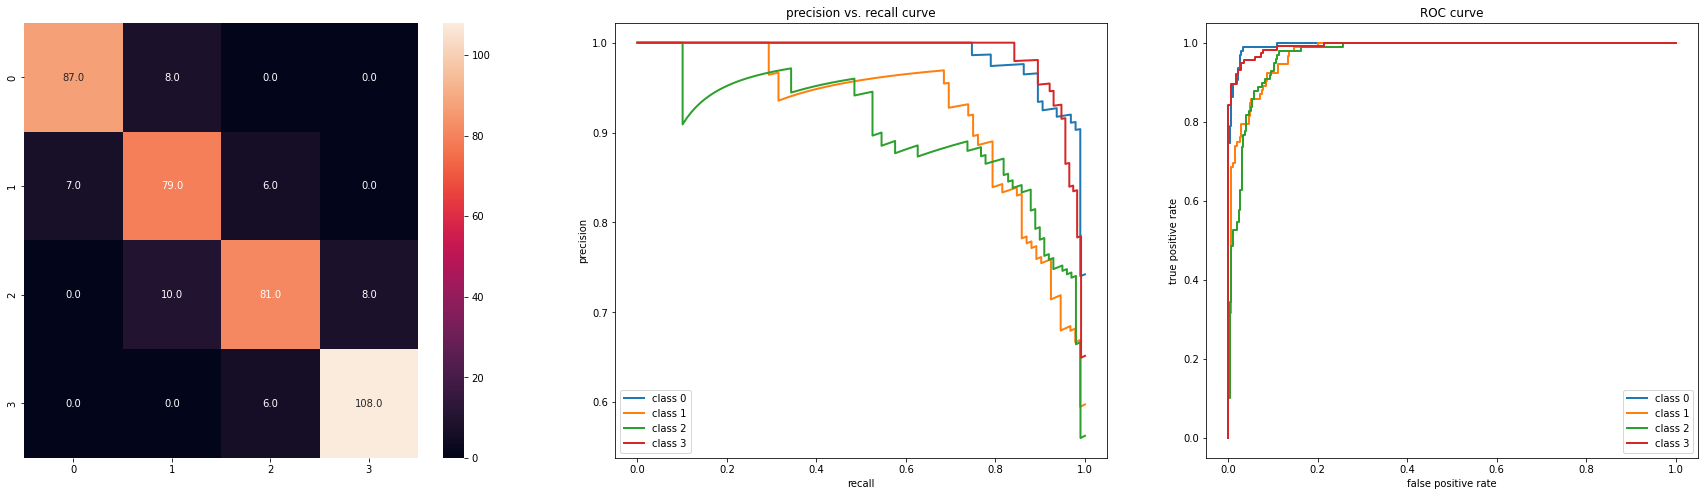

Decision Tree
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        95
           1       0.77      0.86      0.81        92
           2       0.80      0.71      0.75        99
           3       0.88      0.90      0.89       114

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.85      0.84      0.84       400

The ROC AUC score for Decision Tree model: 0.9401583919321242


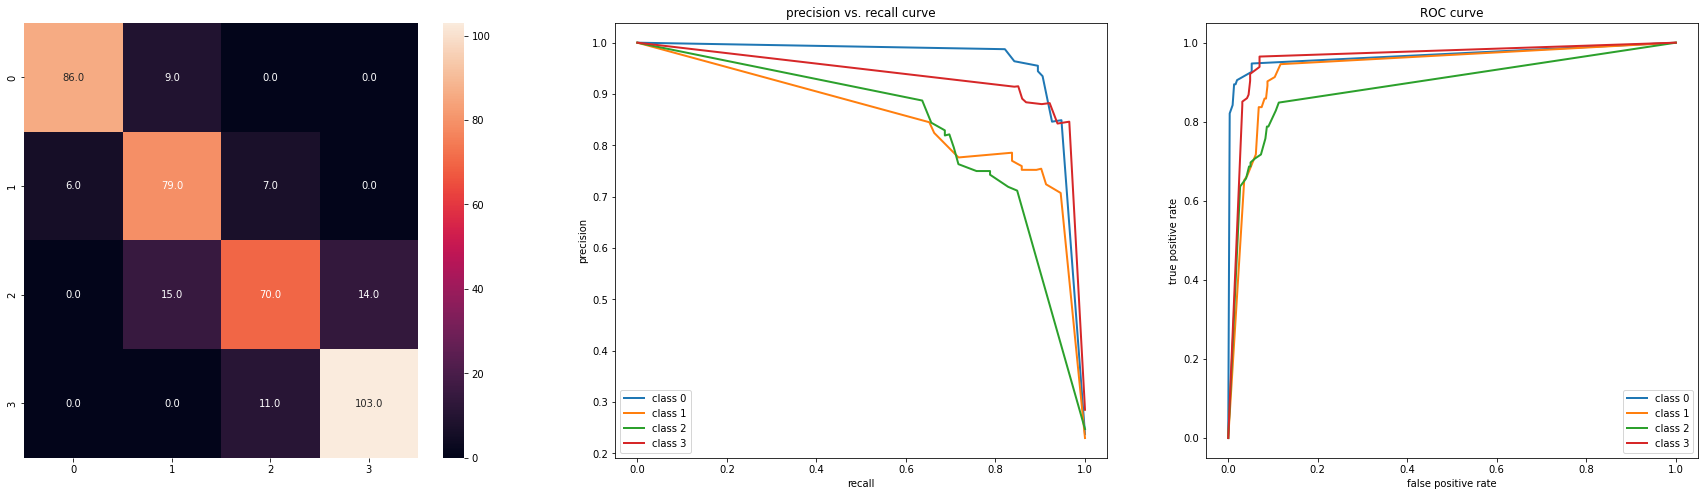

Bagging Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        95
           1       0.89      0.88      0.89        92
           2       0.86      0.84      0.85        99
           3       0.91      0.94      0.93       114

    accuracy                           0.91       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.91      0.90       400

The ROC AUC score for Bagging Decision Tree Classifier model: 0.9856215163029879


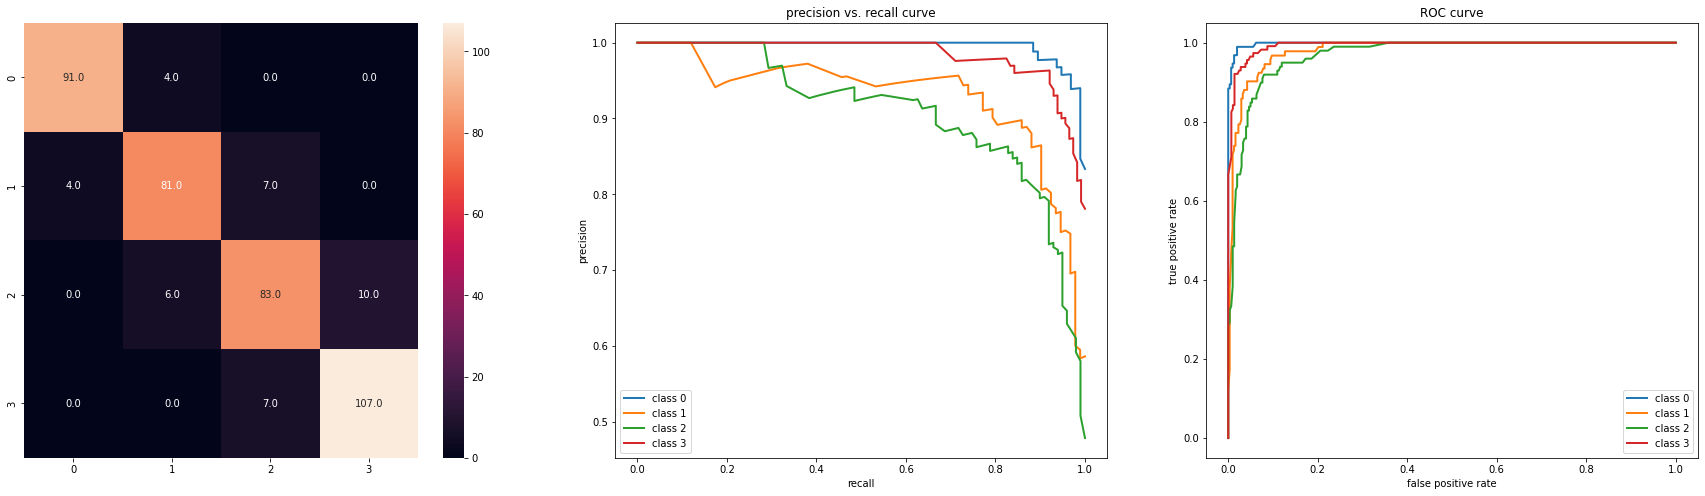

Random Forest
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        95
           1       0.79      0.80      0.80        92
           2       0.76      0.72      0.74        99
           3       0.92      0.91      0.92       114

    accuracy                           0.86       400
   macro avg       0.85      0.86      0.85       400
weighted avg       0.86      0.86      0.86       400

The ROC AUC score for Random Forest model: 0.9805465041534904


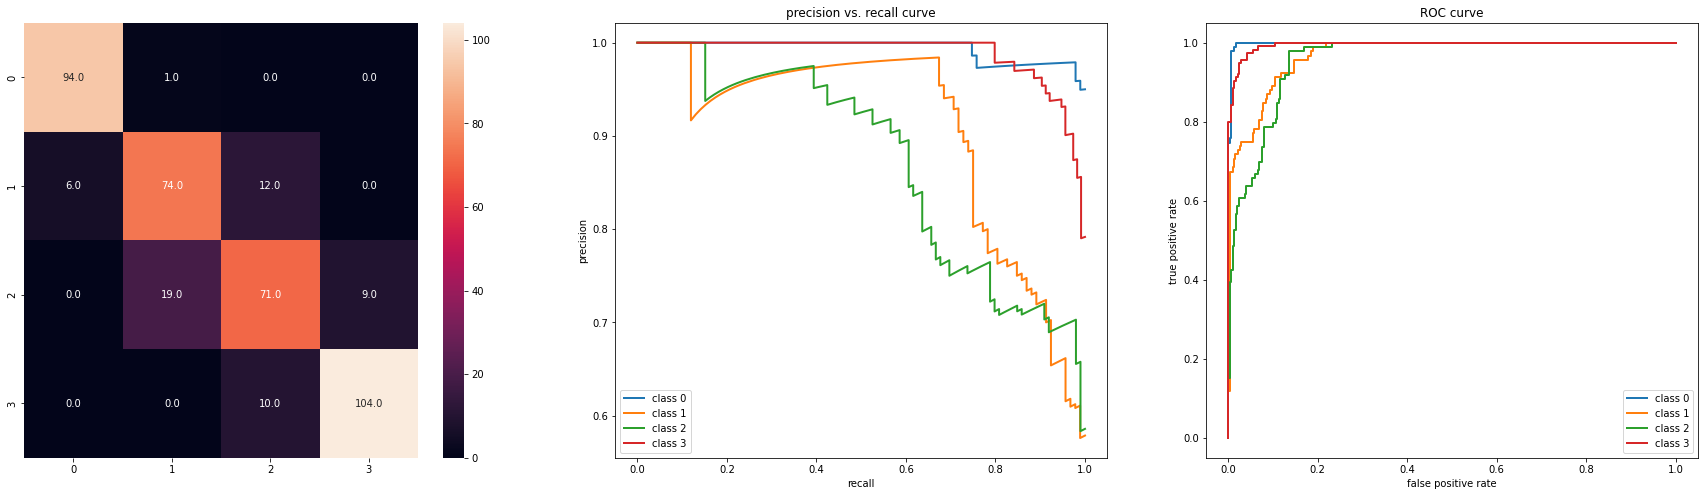

XGBClassifier
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        95
           1       0.91      0.88      0.90        92
           2       0.89      0.87      0.88        99
           3       0.93      0.96      0.95       114

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400

The ROC AUC score for XGBClassifier model: 0.9918638709270142


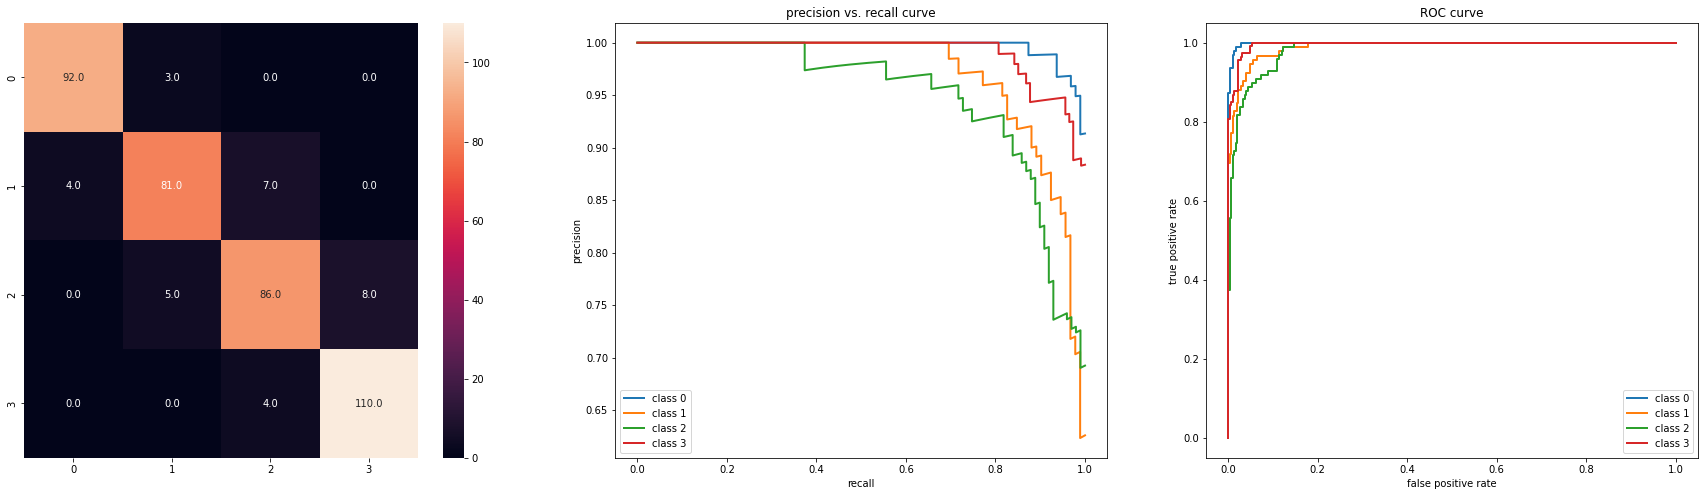

In [37]:
model_fit(models_adj)

In [38]:
estimators = [('log_reg', models_adj["Logisitic Regression"]), ('bag', models_adj["Bagging Decision Tree Classifier"])]

In [39]:
model_vc = {
    "Voting Classifier" : VotingClassifier(estimators,voting='soft', 
                                           verbose=True, 
                                           n_jobs=-1
                                          )
}

Voting Classifier
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        95
           1       0.92      0.96      0.94        92
           2       0.93      0.93      0.93        99
           3       0.97      0.96      0.97       114

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400

The ROC AUC score for Voting Classifier model: 0.9965071703934647


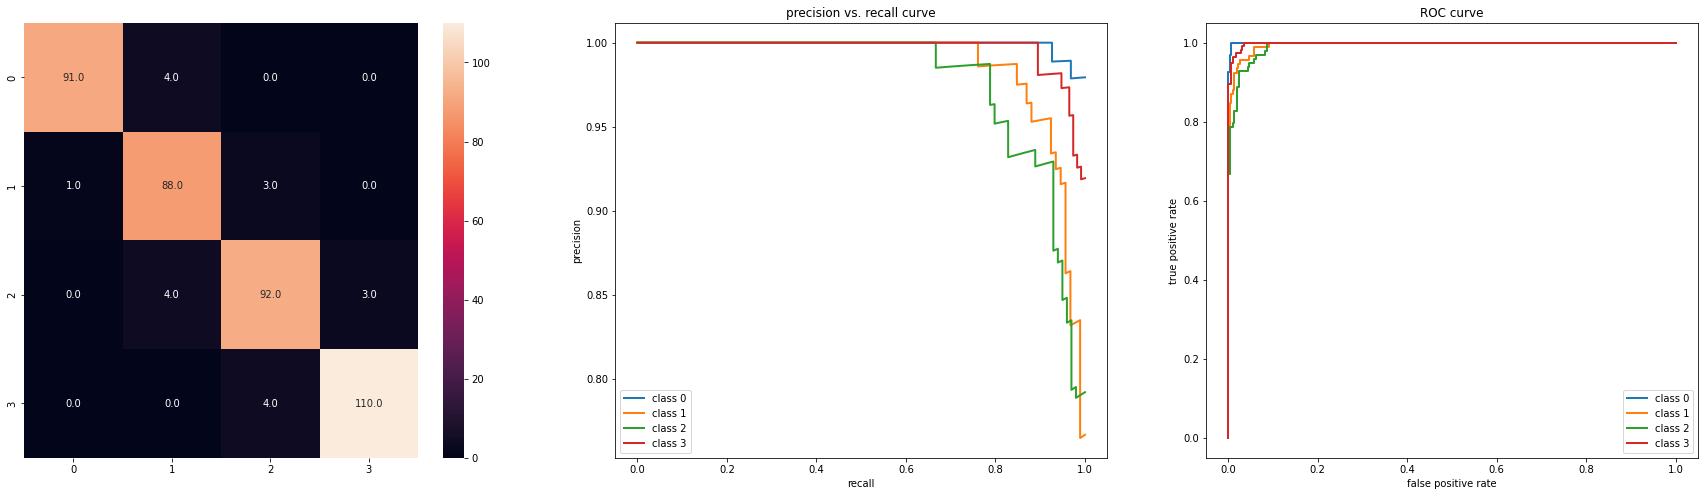

In [40]:
model_fit(model_vc)